# Homework 2 

by Rahma Hayuning Astuti

In [1]:
import pandas as pd
import numpy as np

## Dataset

In [2]:
df = pd.read_csv('D:\MLZoomcamp\module-2\Homework-2\housing.csv')
df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


In [3]:
df.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity'],
      dtype='object')

## EDA

In [4]:
import matplotlib.pyplot
import seaborn as sns

%matplotlib inline 

c:\Users\asus\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\asus\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='median_house_value', ylabel='Count'>

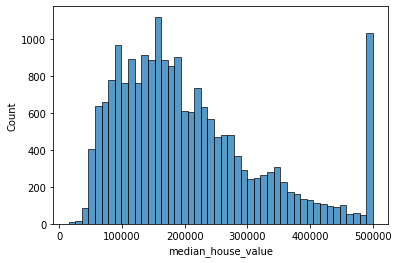

In [5]:
#look at the 'median_house_value'

sns.histplot(df.median_house_value)

c:\Users\asus\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\asus\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='median_house_value', ylabel='Count'>

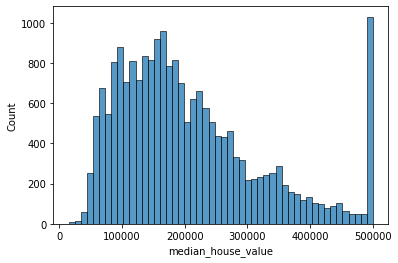

In [6]:
sns.histplot(df.median_house_value, bins = 50)

looks like has a long tail data but at the same time is not

## Preparing the dataset

In [7]:
df_subset = df.query("ocean_proximity in ('<1H OCEAN','INLAND')")

In [8]:
df_subset.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
701,-121.97,37.64,32.0,1283.0,194.0,485.0,171.0,6.0574,431000.0,<1H OCEAN
830,-121.99,37.61,9.0,3666.0,711.0,2341.0,703.0,4.6458,217000.0,<1H OCEAN
859,-121.97,37.57,21.0,4342.0,783.0,2172.0,789.0,4.6146,247600.0,<1H OCEAN
860,-121.96,37.58,15.0,3575.0,597.0,1777.0,559.0,5.7192,283500.0,<1H OCEAN
861,-121.98,37.58,20.0,4126.0,1031.0,2079.0,975.0,3.6832,216900.0,<1H OCEAN


In [9]:
df_subset.shape

(15687, 10)

In [10]:
df_subset = df_subset.drop('ocean_proximity', axis = 1)

In [11]:
df_subset

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
701,-121.97,37.64,32.0,1283.0,194.0,485.0,171.0,6.0574,431000.0
830,-121.99,37.61,9.0,3666.0,711.0,2341.0,703.0,4.6458,217000.0
859,-121.97,37.57,21.0,4342.0,783.0,2172.0,789.0,4.6146,247600.0
860,-121.96,37.58,15.0,3575.0,597.0,1777.0,559.0,5.7192,283500.0
861,-121.98,37.58,20.0,4126.0,1031.0,2079.0,975.0,3.6832,216900.0
...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0


## Question 1

There's one feature with missing values. What is it?

* `total_rooms`
* `total_bedrooms`
* `population`
* `households`

In [12]:
df_subset.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        157
population              0
households              0
median_income           0
median_house_value      0
dtype: int64

The missing value is in 'total_bedrooms'

## Question 2

What's the median (50% percentile) for variable `'population'`?

- 995
- 1095
- 1195
- 1295

In [13]:
med = df_subset['population'].median()
med

1195.0

The answer is 1195

## Prepare and split the data

In [14]:
#to use seed and shuffle it

n = len(df_subset)
idx = np.arange(n)

np.random.seed(42)
np.random.shuffle(idx) #subset dataset

In [15]:
#split dataset to 60, 20, 20
n_val = int(n* 0.2)
n_test = int(n* 0.2)
n_train = n - n_val - n_test

In [16]:
#check that it should be the same

n, n_val + n_test + n_train

(15687, 15687)

In [17]:
n_val, n_test, n_train

(3137, 3137, 9413)

In [18]:
#data that already shuffle
df_shuffle = df.iloc[idx]

In [19]:
#preparing dataset
df_train = df_shuffle.iloc[idx[:n_train]]
df_val = df_shuffle.iloc[idx[n_train:n_train+n_val]]
df_test = df_shuffle.iloc[idx[n_train+n_val:]]

In [20]:
#reset index column

df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

In [21]:
#Apply the log transformation to the `median_house_value` variable using the `np.log1p()` function.

y_train = np.log1p(df_train.median_house_value.values)
y_val = np.log1p(df_val.median_house_value.values)
y_test = np.log1p(df_test.median_house_value.values)

In [22]:
#delete 'median_house_value'

del df_train['median_house_value']
del df_test['median_house_value']
del df_val['median_house_value']

## Question 3

* We need to deal with missing values for the column from Q1.
* We have two options: fill it with 0 or with the mean of this variable.
* Try both options. For each, train a linear regression model without regularization using the code from the lessons.
* For computing the mean, use the training only!
* Use the validation dataset to evaluate the models and compare the RMSE of each option.
* Round the RMSE scores to 2 decimal digits using `round(score, 2)`
* Which option gives better RMSE?

Options:

- With 0
- With mean
- Both are equally good


In [23]:
#preparing data,  filling missing value 
base = ['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       ]

def prepare_X(df, fill_na):
    df_num = df[base]
    df_num = df_num.fillna(fill_na)
    X = df_num.values
    return X

In [24]:
def rmse(y, y_pred):
    se = (y - y_pred) ** 2
    mse = se.mean()
    return np.sqrt(mse)

In [25]:
def train_linear_regression(X, y):
    ones = np.ones(X.shape[0]) 
    X = np.column_stack([ones, X])

    #gamma matrix
    XTX = X.T.dot(X)

    XTX_inv = np.linalg.inv(XTX)
    w_full = XTX_inv.dot(X.T).dot(y)

    return w_full[0], w_full[1:]

In [26]:
#fill with 0 version
X_train_null = prepare_X(df_train, fill_na= 0)
w0_null, w_null = train_linear_regression(X_train_null, y_train)

X_val_null = prepare_X(df_val, fill_na= 0)
y_pred_null = w0_null + X_val_null.dot(w_null)

In [27]:
rmse_null = np.round(rmse(y_val, y_pred_null), 2)
rmse_null

0.35

In [28]:
#fill with mean version of 'total_bedrooms' because there's missing data
mean_ttlbedrm = df_train['total_bedrooms'].mean() #only use train

X_train_mean = prepare_X(df_train, fill_na= mean_ttlbedrm)
w0_mean, w_mean = train_linear_regression(X_train_mean, y_train)

X_val_mean = prepare_X(df_val, fill_na= mean_ttlbedrm) 
y_pred_mean = w0_mean + X_val_mean.dot(w_mean)

In [29]:
rmse_mean = np.round(rmse(y_val, y_pred_mean), 2)
rmse_mean

0.35

The answer for question 3 is both are equally good.


## Question 4

* Now let's train a regularized linear regression.
* For this question, fill the NAs with 0. 
* Try different values of `r` from this list: `[0, 0.000001, 0.0001, 0.001, 0.01, 0.1, 1, 5, 10]`.
* Use RMSE to evaluate the model on the validation dataset.
* Round the RMSE scores to 2 decimal digits.
* Which `r` gives the best RMSE?

If there are multiple options, select the smallest `r`.

Options:

- 0
- 0.000001
- 0.001
- 0.0001

In [30]:
def train_linear_regression_reg(X, y, r =0.0):
    ones = np.ones(X.shape[0]) 
    X = np.column_stack([ones, X])

    #gamma matrix
    XTX = X.T.dot(X)
    XTX = XTX + r * np.eye(XTX.shape[0])
    
    XTX_inv = np.linalg.inv(XTX)
    w_full = XTX_inv.dot(X.T).dot(y)

    return w_full[0], w_full[1:]

In [31]:
for r in [0, 0.000001, 0.0001, 0.001, 0.01, 0.1, 1, 5, 10]:
    w0_null_reg, w_null_reg = train_linear_regression_reg(X_train_null, y_train, r = r)
    y_pred_null_reg = w0_null_reg + X_val_null.dot(w_null_reg)
    score = np.round(rmse(y_val, y_pred_null_reg), 2)

    print(r, w0_null_reg, score)

0 -9.271072073587677 0.35
1e-06 -9.27104992678664 0.35
0.0001 -9.268857941118851 0.35
0.001 -9.248978220839946 0.35
0.01 -9.054771211548987 0.35
0.1 -7.483325026553265 0.35
1 -2.73429416098051 0.36
5 -0.7136532895310658 0.36
10 -0.3697062491748081 0.36


because the rmse score that smaller one is 0.35 and there are more than 1 so the lowest r score is 0

the answer is 0

## Question 5 

* We used seed 42 for splitting the data. Let's find out how selecting the seed influences our score.
* Try different seed values: `[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]`.
* For each seed, do the train/validation/test split with 60%/20%/20% distribution.
* Fill the missing values with 0 and train a model without regularization.
* For each seed, evaluate the model on the validation dataset and collect the RMSE scores. 
* What's the standard deviation of all the scores? To compute the standard deviation, use `np.std`.
* Round the result to 3 decimal digits (`round(std, 3)`)

What's the value of std?

- 0.5
- 0.05
- 0.005
- 0.0005

In [32]:
rmse_null_seed = []

for s in [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]:
    n = len(df_subset)
    idx = np.arange(n)
    np.random.seed(s)
    np.random.shuffle(idx)

    #split dataset to 60, 20, 20
    n_val = int(n* 0.2)
    n_test = int(n* 0.2)
    n_train = n - n_val - n_test
    
    #data that already shuffle
    df_shuffle = df.iloc[idx]
    
    #preparing dataset
    df_train = df_shuffle.iloc[idx[:n_train]]
    df_val = df_shuffle.iloc[idx[n_train:n_train+n_val]]
    df_test = df_shuffle.iloc[idx[n_train+n_val:]]
    
    #reset index column
    df_train = df_train.reset_index(drop=True)
    df_val = df_val.reset_index(drop=True)
    df_test = df_test.reset_index(drop=True)

    #Apply the log transformation to the `median_house_value` variable using the `np.log1p()` function.
    y_train = np.log1p(df_train.median_house_value.values)
    y_val = np.log1p(df_val.median_house_value.values)
    y_test = np.log1p(df_test.median_house_value.values)

    #delete 'median_house_value'
    del df_train['median_house_value']
    del df_test['median_house_value']
    del df_val['median_house_value']

    #fill with 0 version
    X_train_null = prepare_X(df_train, fill_na= 0)
    w0_null, w_null = train_linear_regression(X_train_null, y_train)

    X_val_null = prepare_X(df_val, fill_na= 0)
    y_pred_null = w0_null + X_val_null.dot(w_null)

    rmse_null = np.round(rmse(y_val, y_pred_null), 2)

    rmse_null_seed.append(rmse_null)
    print(r, w0_null, rmse_null)
    
        

10 -9.283372724780044 0.36
10 -9.295011946908849 0.35
10 -9.058407567627427 0.35
10 -9.175799038191954 0.35
10 -9.078730481917193 0.34
10 -9.226697938063918 0.34
10 -9.248144352792664 0.34
10 -8.778058769792068 0.34
10 -8.890239956891778 0.34
10 -9.582324268238283 0.34


In [33]:
rmse_null_seed

[0.36, 0.35, 0.35, 0.35, 0.34, 0.34, 0.34, 0.34, 0.34, 0.34]

In [34]:
#standar deviation

std_score = np.std(rmse_null_seed).round(decimals= 3)
std_score

0.007

It's 0.007 a little different with option but the closest one is 0.005
so, the answer is 0.005

## Question 6

* Split the dataset like previously, use seed 9.
* Combine train and validation datasets.
* Fill the missing values with 0 and train a model with `r=0.001`. 
* What's the RMSE on the test dataset?

Options:

- 0.13
- 0.23
- 0.33
- 0.43

In [35]:
#split data with seed 9
n = len(df_subset)
idx = np.arange(n)

np.random.seed(9)
np.random.shuffle(idx)

n_val = int(n* 0.2)
n_test = int(n* 0.2)
n_train = n - n_val - n_test

df_shuffle = df.iloc[idx]
df_train = df_shuffle.iloc[idx[:n_train]]
df_val = df_shuffle.iloc[idx[n_train:n_train+n_val]]
df_test = df_shuffle.iloc[idx[n_train+n_val:]]

#combine train and val dataset
combine = [df_train, df_val]
df_train_val = pd.concat(combine)

In [36]:
df_train_val.shape

(12550, 10)

In [37]:
df_train_val = df_train_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

y_train_val = np.log1p(df_train_val.median_house_value.values)
y_test = np.log1p(df_test.median_house_value.values)

del df_train_val['median_house_value']
del df_test['median_house_value']


In [38]:
#train model with r = 0.001
r= 0.001
X_train_val = prepare_X(df_train_val, fill_na= 0)
w0_reg, w_reg = train_linear_regression_reg(X_train_val, y_train_val, r = r)

X_test = prepare_X(df_test, fill_na= 0)
y_pred_test = w0_reg + X_test.dot(w_reg)
score = np.round(rmse(y_test, y_pred_test), 2)

score

0.35

The answer is 0.35 but because in the option there's no 0.35, so we choose 0.33 because it's closest one